# **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

# **Data exploration and Information**

In [2]:
df = pd.read_csv('C:/Idris/Ecole/2A/Projets info/Credit Card Fraud Detection/creditcard_2023.csv')
print('shape of our data:', df.shape)


shape of our data: (568630, 31)


In [3]:
# let's see what it actually looks like by showing the first 5 data
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [4]:
# and now the data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
# and to finish, the data description
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


****Interpretation****

- There are 568630 rows having each 31 columns
- 'Class' is the output feature, indicating whether a transaction is fraudulent (1) or not (0) 

# **Data Preprocessing**

In [6]:
# checking if there's any missing values
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# checking if there's any duplicates
df.duplicated().any()

False

**Interpretation**

- There are no missing values
- There are no duplicates

# **Data Analysis**

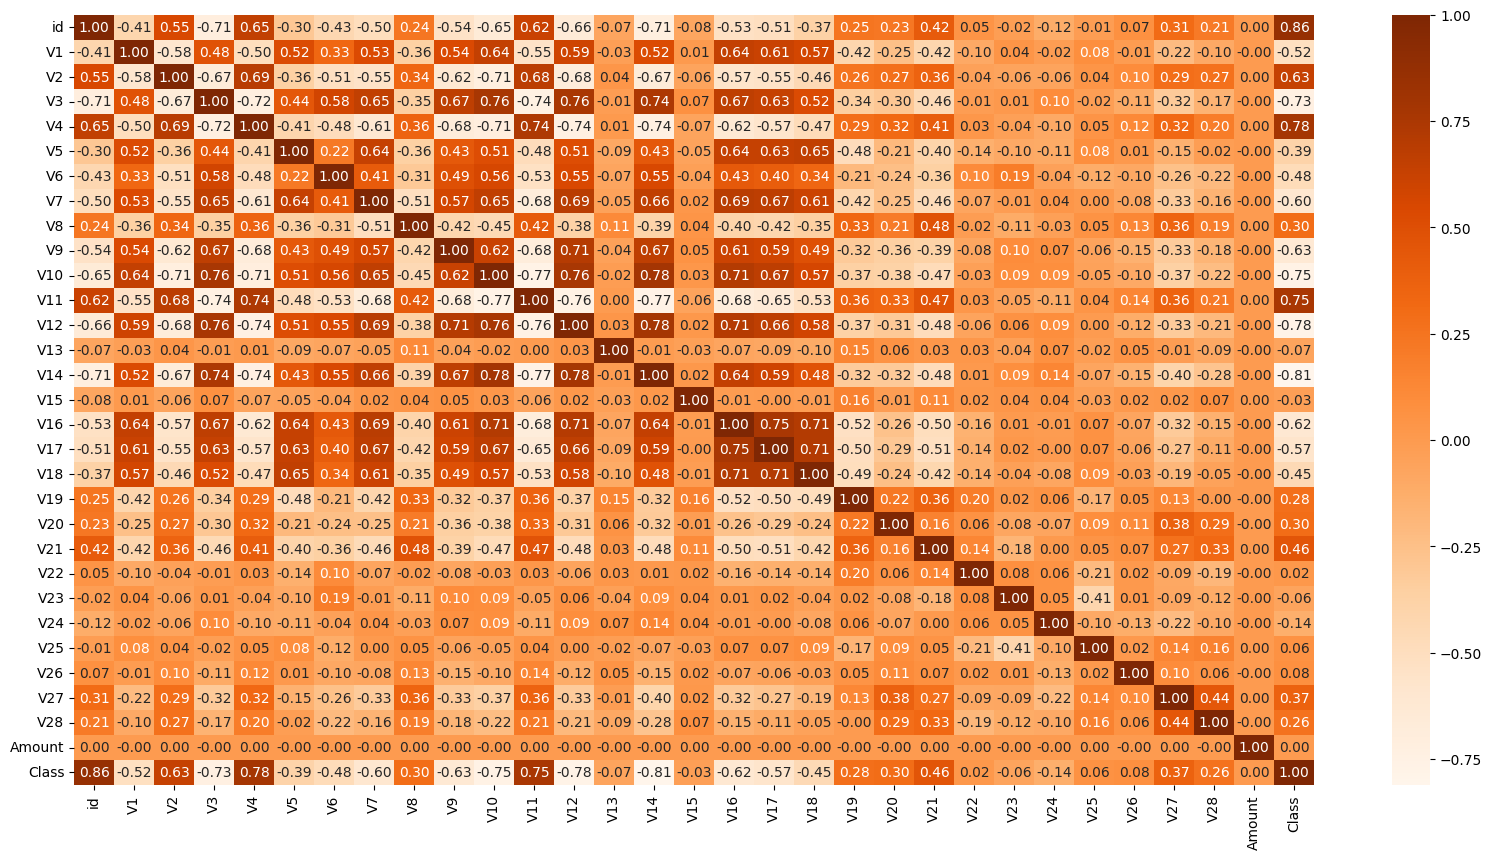

In [8]:
# let's create the Heatmap
corr_matrix = df.corr(method='spearman') #use of the spearman method to obtain the correlation matrix as the dataset is big and the features are continuous

# create the figure
plt.figure(figsize=(20, 10))

# construct the Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt='.2f') #displays the PCC with 1 decimal place
plt.show()

**Interpretation**

- Few features have high co-relation among different features.
- V17 and V18 are higly co-related.
- V16 and V17 are higly co-related.
- V14 has a negative corelation with V4.
- V12 has a negative corelation with V11 but a high corelation with V3 and V14.
- V10 has a negative corelation with V11 and V3 but a high corelation with V12 and V14.
  

In [9]:
# let's skew our data
df.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

**Interpretation**

- Features V20,V2 and V7 are highly negatively skewed.
- Let's have a look at the distribution of these features.


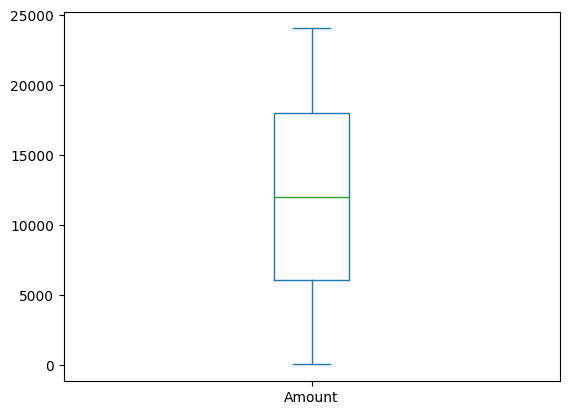

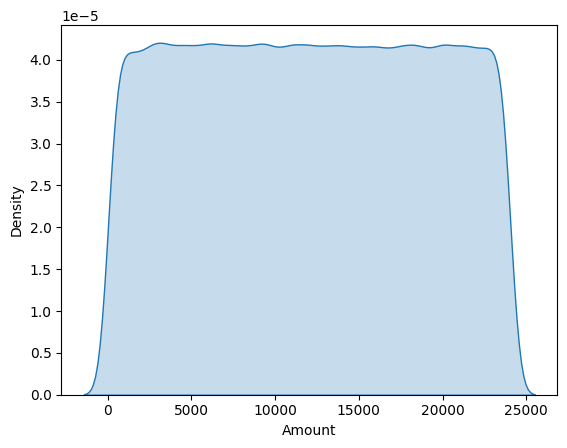

In [10]:
# distribution of the feature "Amount"
df['Amount'].plot.box()
plt.show()
plt.close()
sns.kdeplot(data=df['Amount'], fill=True)
plt.show()

**Interpretation**

- Amount is normally distributed.

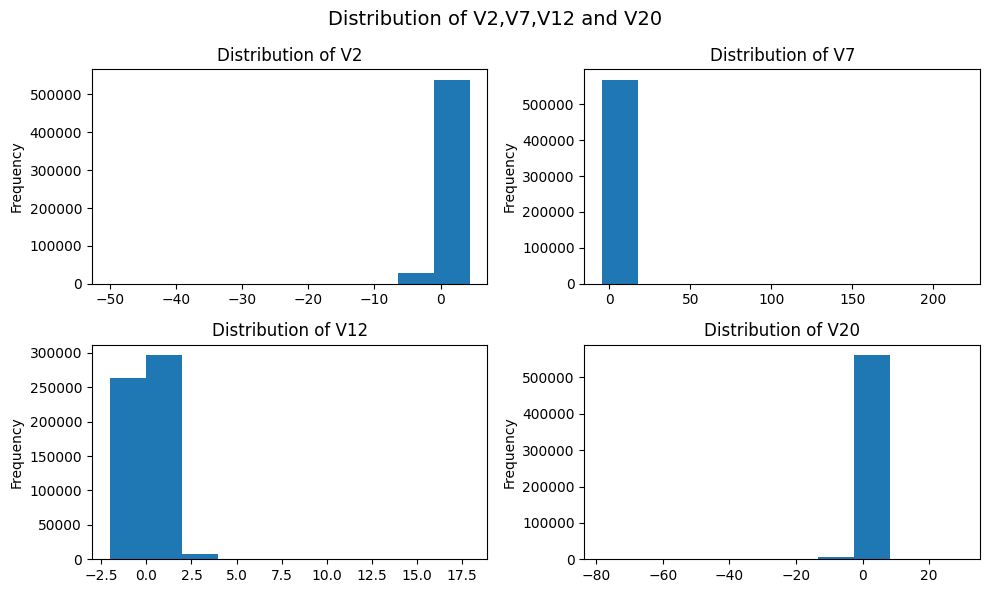

In [11]:
# now let's look at V2, V7, V12 and V20 by plotting a histogram
paper, axes = plt.subplots(2, 2, figsize=(10, 6))
df['V2'].plot(kind='hist', ax=axes[0,0], title='Distribution of V2')
df['V7'].plot(kind='hist', ax=axes[0,1], title='Distribution of V7')
df['V12'].plot(kind='hist', ax=axes[1,0], title='Distribution of V12')
df['V20'].plot(kind='hist', ax=axes[1,1], title='Distribution of V20')
plt.suptitle('Distribution of V2,V7,V12 and V20',size=14)
plt.tight_layout()
plt.show()

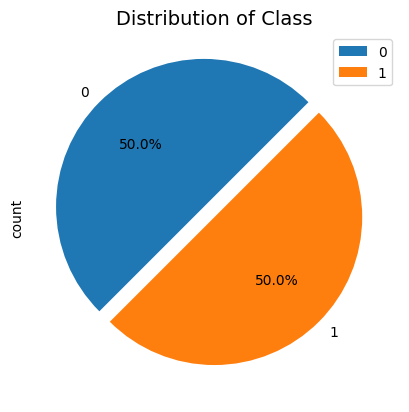

In [12]:
# and a look at the output feature "Class"
df['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%', legend=True,startangle=45)
plt.title('Distribution of Class',size=14)
plt.show()

**Interpretation**

- The output feature is equally balanced.

# **Data Preparation**

In [13]:
# let's choose our parameters
test_size = 0.3
random_state = 4320
# and the hyperparameters
learning_rate = 0.01
hidden_layers=[3,3,3]
batch_size=100
max_epochs=100

In [14]:
# we divide our data first
Xlabel =["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]
ylabel = ["Class"]

# split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df[Xlabel],df[ylabel], test_size=test_size, random_state=random_state)
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Artificial Neural Network (ANN)**

In [15]:
# custom dataset class to handle feature (X) and label (y) data for PyTorch
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values if isinstance(y, pd.DataFrame) else y, dtype=torch.float32)
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
        
module = []

#initializing the module
module.append(nn.Linear(len(Xlabel), hidden_layers[0]))
module.append(nn.ReLU())

#adding every other layer (hidden layers) except the output layer
for i in range(1, len(hidden_layers)):
    module.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
    module.append(nn.ReLU())

# the output layer is fixed to 1 neural and sigmoid
module.append(nn.Linear(hidden_layers[-1], 1))
module.append(nn.Sigmoid())

# create the nn model based on the list
model = nn.Sequential(*module)

        
# create the DataLoader for the training set
mytrain = MyDataset(X_train, y_train)
train_loader = DataLoader(mytrain, batch_size=batch_size,shuffle=False)
    
# use MSE loss function, and SGD optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        
# training loop
for epoch in range(max_epochs):
    print("Debug: at epoch: ", epoch)
    for data, labels in train_loader:
        pred = model(data) #forward propagation
        loss = loss_function(pred, labels)
        model.zero_grad()
        loss.backward() #backward propagation
        optimizer.step() #gradient descent
        
# create the DataLoader for the testing set
mytest = MyDataset(X_test, y_test)
test_loader = DataLoader(mytest, batch_size=batch_size, shuffle=False)
         
# testing loop
y_pred = [] #list of the predicted values
for data, labels in test_loader:
    pred = model(data) #forward propagation
    for i in pred:
        y_pred.append(1.0 if i.item() > 0.5 else 0.0)
                        

Debug: at epoch:  0
Debug: at epoch:  1
Debug: at epoch:  2
Debug: at epoch:  3
Debug: at epoch:  4
Debug: at epoch:  5
Debug: at epoch:  6
Debug: at epoch:  7
Debug: at epoch:  8
Debug: at epoch:  9
Debug: at epoch:  10
Debug: at epoch:  11
Debug: at epoch:  12
Debug: at epoch:  13
Debug: at epoch:  14
Debug: at epoch:  15
Debug: at epoch:  16
Debug: at epoch:  17
Debug: at epoch:  18
Debug: at epoch:  19
Debug: at epoch:  20
Debug: at epoch:  21
Debug: at epoch:  22
Debug: at epoch:  23
Debug: at epoch:  24
Debug: at epoch:  25
Debug: at epoch:  26
Debug: at epoch:  27
Debug: at epoch:  28
Debug: at epoch:  29
Debug: at epoch:  30
Debug: at epoch:  31
Debug: at epoch:  32
Debug: at epoch:  33
Debug: at epoch:  34
Debug: at epoch:  35
Debug: at epoch:  36
Debug: at epoch:  37
Debug: at epoch:  38
Debug: at epoch:  39
Debug: at epoch:  40
Debug: at epoch:  41
Debug: at epoch:  42
Debug: at epoch:  43
Debug: at epoch:  44
Debug: at epoch:  45
Debug: at epoch:  46
Debug: at epoch:  47
De

In [16]:
# now we define a function for the metrics
def model_eval(actual, predicted):
  acc_score = metrics.accuracy_score(actual, predicted)
  conf_matrix = metrics.confusion_matrix(actual, predicted)
  clas_rep = metrics.classification_report(actual, predicted)
  print('model accuracy: ',acc_score)
  print(conf_matrix)
  print(clas_rep)

In [17]:
# calculations of the metrics for the testing dataset
print('Training Accuracy')
model_eval(y_test,y_pred)

Training Accuracy
model accuracy:  0.9818569778825129
[[83564  1835]
 [ 1260 83930]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     85399
           1       0.98      0.99      0.98     85190

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



**Interpretation**

- We have 98.2% accuracy with our ANN model.

# **Logistic Regression**

In [18]:
# build the logistic regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)
# training and testing
preds_lr_train = lr.predict(X_train)
pred_lr_test = lr.predict(X_test)

c:\Users\inech\anaconda3\envs\new_env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# calculations of the metrics for the testing dataset
print('Training Accuracy')
model_eval(y_test,pred_lr_test)

Training Accuracy
model accuracy:  0.9653142934186847
[[83575  1824]
 [ 4093 81097]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85399
           1       0.98      0.95      0.96     85190

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



**Interpretation**

- We have 96.5% accuracy with our Logistic Regression model.

# **Conclusion**

- Both models produce good accuracy scores, thus the hypothesis of linearly separable data is partly verified. Indeed, Logistic Regression assumes that there is a linear relationship between the input variables and the output.

- Nevertheless, with only 100 epochs, the ANN model produces better results than the Logistic Regression. This suggests that the data may not be strictly linearly separable. The ANN, being a more flexible model with multiple layers and non-linear activation functions, can capture more complex patterns than linear ones , which likely explains its superior performance.